In [2]:
import pandas as pd
df = pd.read_csv("d:/data/ozone/ozone2.csv")
df.head()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
0,41.00000,0,190.000000,7.4,67,5,1
1,36.00000,0,118.000000,8.0,72,5,2
2,12.00000,0,149.000000,12.6,74,5,3
3,18.00000,0,313.000000,11.5,62,5,4
4,42.12931,0,185.931507,14.3,56,5,5


In [3]:
df.columns

Index(['Ozone', 'Result', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [4]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df[["Ozone"]]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [7]:
import numpy as np
X_train = np.array(X_train_scaled,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)
X_test = np.array(X_test_scaled,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [8]:
import torch
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

In [9]:
import torch.nn as nn
input_dim = X_train.shape[1]
output_dim = 64
model = nn.Sequential(
    nn.Linear(input_dim,24),
    nn.ReLU(),
    nn.Linear(24,12),
    nn.ReLU(),
    nn.Linear(12,3),
    nn.ReLU(),
    nn.Linear(3,1)
)
print(model)
print(model[6].weight)
print(model[6].bias)

Sequential(
  (0): Linear(in_features=3, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Parameter containing:
tensor([[ 0.4495,  0.0204, -0.0528]], requires_grad=True)
Parameter containing:
tensor([-0.2212], requires_grad=True)


In [11]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
#                   최적화 함수                     학습률
loss_list = []
iteration_number = 5000
for iteration in range(iteration_number):
    optimizer.zero_grad()
    results = model(inputs)
    
    loss = mse(results, targets)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)

    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 2820.016845703125
epoch 50, loss 420.1640319824219
epoch 100, loss 347.13623046875
epoch 150, loss 335.8968200683594
epoch 200, loss 322.701416015625
epoch 250, loss 310.9900817871094
epoch 300, loss 303.8330383300781
epoch 350, loss 294.96661376953125
epoch 400, loss 284.4056701660156
epoch 450, loss 265.9936218261719
epoch 500, loss 238.7067413330078
epoch 550, loss 214.56399536132812
epoch 600, loss 194.71890258789062
epoch 650, loss 182.8081512451172
epoch 700, loss 177.30613708496094
epoch 750, loss 172.5081024169922
epoch 800, loss 169.95606994628906
epoch 850, loss 166.0081787109375
epoch 900, loss 162.98277282714844
epoch 950, loss 158.4835205078125
epoch 1000, loss 156.59878540039062
epoch 1050, loss 154.85589599609375
epoch 1100, loss 153.49708557128906
epoch 1150, loss 152.53550720214844
epoch 1200, loss 151.63473510742188
epoch 1250, loss 141.9448699951172
epoch 1300, loss 135.4307861328125
epoch 1350, loss 128.2781219482422
epoch 1400, loss 120.32113647460938

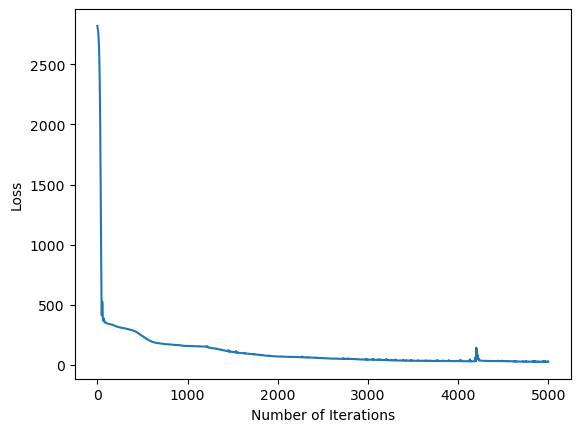

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [13]:
input_x_test = torch.from_numpy(X_test)
predicted = model(input_x_test.float()).data.numpy()
predicted[0:5]

array([[12.867026],
       [32.368176],
       [70.576675],
       [22.42933 ],
       [79.5004  ]], dtype=float32)

In [14]:
loss.data.item()

24.504392623901367

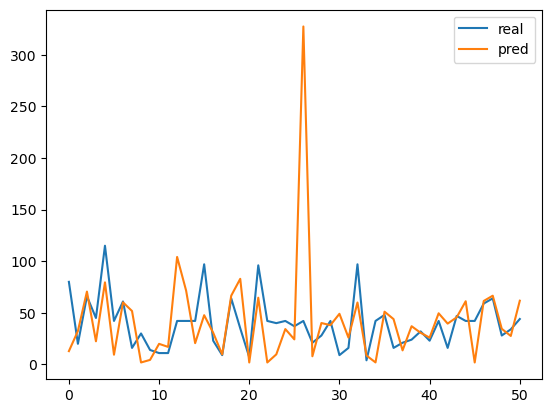

In [15]:
X_test = torch.from_numpy(X_test)
plt.plot(y_test, label='real')
plt.plot(model(X_test).detach().numpy(), label='pred')
plt.legend()
plt.show()